# Video Game Sales Analysis

## Scopul proiectului

Acest proiect urmareste vanzarile a mai multor jocuri video pe parcursul anilor si analizeaza diferite tendinte si factori care influenteaza aceste vanzari.

## Biblioteci necesare



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Citirea fisierului CSV care contine baza de date

In [3]:
ds=pd.read_csv('dataset/vgchartz-2024.csv')
ds

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


## Depistarea valorilor lipsa

In [5]:
missing_values = ds.isnull().sum()
missing_values

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

## Completarea valorilor numerice lipsa folosind interpolarea

In [19]:
ds = ds.interpolate(method='linear', limit_direction='forward')
ds

/var/folders/l1/9lz4qt3s263d473lswq3flw80000gn/T/ipykernel_35819/379138119.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ds = ds.interpolate(method='linear', limit_direction='forward')


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,8.85,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,8.00,0.00,0.00,0.00,0.00,0.00,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,8.00,0.00,0.00,0.00,0.00,0.00,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,8.00,0.00,0.00,0.00,0.00,0.00,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,8.00,0.00,0.00,0.00,0.00,0.00,2019-02-28,2019-02-24


## Curatarea datelor duplicate

In [20]:
ds = ds.drop_duplicates()
ds

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,8.85,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,8.00,0.00,0.00,0.00,0.00,0.00,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,8.00,0.00,0.00,0.00,0.00,0.00,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,8.00,0.00,0.00,0.00,0.00,0.00,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,8.00,0.00,0.00,0.00,0.00,0.00,2019-02-28,2019-02-24


## Eliminarea jocurilor cu un total de 0 vanzari

In [24]:
ds = ds[ds['total_sales']!=0]
ds

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.400000,20.32,6.370000,0.99,9.850000,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.700000,19.39,6.060000,0.60,9.710000,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.600000,16.15,8.410000,0.47,5.490000,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,8.850000,15.86,9.060000,0.06,5.330000,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.100000,15.09,6.180000,0.41,6.050000,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17565,/games/boxart/full_4742781JapanFrontccc.jpg,Root Double: Before Crime * After Days,X360,Visual Novel,Yeti,Yeti,8.609375,0.01,0.004571,0.01,0.002174,0.00,2012-06-14,2019-05-10
17566,/games/boxart/full_6112358JapanFrontccc.jpg,Gakuen Hetalia,DS,Visual Novel,Idea Factory,Idea Factory,8.662500,0.01,0.004286,0.01,0.001739,0.00,2012-03-08,2019-05-08
17567,/games/boxart/full_8989045JapanFrontccc.jpg,Chaos;Child: Love Chu Chu!!,PSV,Visual Novel,5pb,5pb. Inc.,8.715625,0.01,0.004000,0.01,0.001304,0.00,2017-03-30,2018-01-15
17568,/games/boxart/full_9324379JapanFrontccc.jpg,Doukoku Soshite... Doukoku Soshite...,PS4,Visual Novel,El Dia,El Dia,8.768750,0.01,0.003714,0.01,0.000870,0.00,2018-04-26,2018-05-20


## Descrierea bazei de date

In [25]:
ds.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,17570.000000,17570.000000,17570.000000,17570.000000,17570.000000,17570.000000
mean,6.899167,0.375977,0.208874,0.109334,0.120495,0.038575
std,1.235513,0.831906,0.432234,0.143232,0.340243,0.118362
min,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,6.218182,0.050000,0.030000,0.030000,0.010000,0.000000
50%,7.014286,0.140000,0.080000,0.060000,0.030000,0.010000
75%,7.785714,0.380000,0.210000,0.133333,0.100000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


## Histograma 

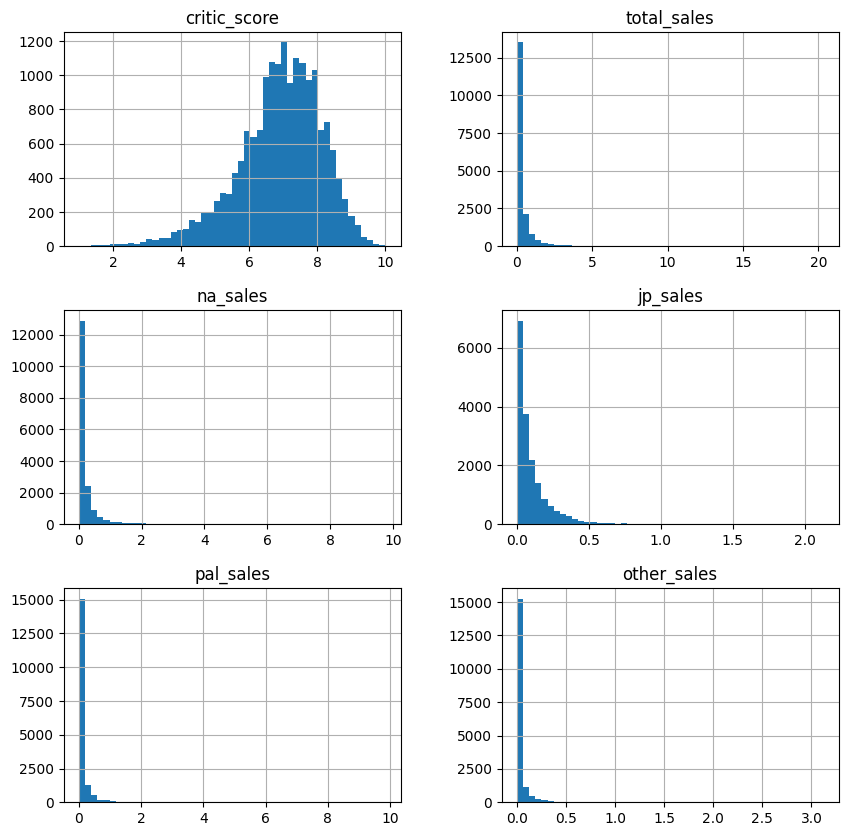

In [26]:
ds.hist(figsize=(10,10),bins=50)
plt.show()